<a href="https://colab.research.google.com/github/Gowri-Rk/Machine-Learning/blob/master/Colabs/Models/ML_Assignment1_GMM_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.mixture import GaussianMixture 

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive')
ds = pd.read_csv("/content/gdrive/My Drive/MLSpring2020/datatribe-nutritionbasediseaseprediction/Assignments/Assignment 1/Gowri/demographic.csv")


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ds.head(10)

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,DMQMILIZ,DMQADFC,DMDBORN4,DMDCITZN,DMDYRSUS,DMDEDUC3,DMDEDUC2,DMDMARTL,RIDEXPRG,SIALANG,SIAPROXY,SIAINTRP,FIALANG,FIAPROXY,FIAINTRP,MIALANG,MIAPROXY,MIAINTRP,AIALANGA,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,DMDHRBR4,DMDHREDU,DMDHRMAR,DMDHSEDU,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,INDHHIN2,INDFMIN2,INDFMPIR,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59
0,73557,8,2,1,69,NaN,4,4,1.0,NaN,1.0,1.0,1,1.0,NaN,NaN,3.0,4.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,3,3,0,0,2,1,69,1.0,3.0,4.0,NaN,13281.23739,13481.04210,1,112,4.0,4.0,0.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
1,73558,8,2,1,54,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,54,1.0,3.0,1.0,1.0,23682.05739,24471.76963,1,108,7.0,7.0,1.78,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,73559,8,2,1,72,NaN,3,3,2.0,NaN,1.0,1.0,1,1.0,NaN,NaN,4.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,72,1.0,4.0,1.0,3.0,57214.80332,57193.28538,1,109,10.0,10.0,4.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,73560,8,2,1,9,NaN,3,3,1.0,119.0,NaN,NaN,1,1.0,NaN,3.0,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,4,4,0,2,0,1,33,1.0,3.0,1.0,4.0,55201.17859,55766.51244,2,109,9.0,9.0,2.52,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,73561,8,2,2,73,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,NaN,2,2,0,0,2,1,78,1.0,5.0,1.0,5.0,63709.66707,65541.87123,2,116,15.0,15.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,73562,8,2,1,56,NaN,1,1,1.0,NaN,1.0,2.0,1,1.0,NaN,NaN,4.0,3.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1,1,0,0,0,1,56,1.0,4.0,3.0,NaN,24978.14460,25344.99236,1,111,9.0,9.0,4.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,73563,8,2,1,0,5.0,3,3,2.0,6.0,NaN,NaN,1,1.0,NaN,NaN,NaN,NaN,NaN,1,1.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,3,3,1,0,0,1,31,1.0,5.0,1.0,5.0,18040.81843,17913.55507,1,105,15.0,15.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,73564,8,2,2,61,NaN,3,3,2.0,NaN,2.0,NaN,1,1.0,NaN,NaN,5.0,2.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,1,1,0,0,1,2,61,1.0,5.0,2.0,NaN,60325.09525,61758.65488,1,114,10.0,10.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,73565,8,1,1,42,NaN,2,2,NaN,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,1.0,NaN,1,2.0,2,1.0,2.0,2.0,NaN,NaN,NaN,NaN,4,4,1,1,0,1,42,1.0,3.0,1.0,5.0,23307.67563,0.00000,2,106,15.0,15.0,5.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,73566,8,2,2,56,NaN,3,3,1.0,NaN,2.0,NaN,1,1.0,NaN,NaN,3.0,3.0,NaN,1,2.0,2,1.0,2.0,2.0,1.0,2.0,2.0,1.0,7,7,3,0,0,2,56,1.0,3.0,3.0,NaN,16351.78314,17480.11518,1,112,4.0,4.0,0.48,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X = ds.dropna(axis='columns')

In [ ]:
#plot the data
plt.scatter(ds) 

TypeError: ignored

In [ ]:
gmm = GaussianMixture(n_components = 3) 


In [ ]:
gmm.fit(X) 


GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=3, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [ ]:
pd.options.mode.chained_assignment = None  # default='warn'

In [ ]:
# Assign a label to each sample 
labels = gmm.predict(X) 
X['labels']= labels 
d0 = X[X['labels']== 0] 
d1 = X[X['labels']== 1] 
d2 = X[X['labels']== 2] 

In [ ]:
d0

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,labels
8,73565,8,1,1,42,2,2,1,1,2,4,4,1,1,0,1,42,23307.675630,0.000000,2,106,0
12,73569,8,1,2,0,5,7,1,1,2,4,4,2,0,0,2,30,6673.803649,0.000000,1,110,0
20,73577,8,2,1,32,1,1,2,2,1,7,5,3,2,0,2,32,36284.650270,39735.017070,2,118,0
68,73625,8,1,1,13,1,1,1,2,2,5,5,0,3,0,2,42,10295.136540,0.000000,1,118,0
77,73634,8,1,1,65,4,4,1,1,2,3,3,0,0,1,1,65,14047.623960,0.000000,2,113,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10049,83606,8,2,1,7,5,6,2,1,1,4,4,1,1,0,1,43,9603.082308,10431.848520,2,104,0
10060,83617,8,2,2,2,1,1,1,2,1,4,4,2,0,0,2,27,7807.306960,8150.604779,2,118,0
10078,83635,8,1,2,17,3,3,1,1,2,7,7,0,4,0,1,55,26001.173780,0.000000,1,113,0
10095,83652,8,1,1,39,5,6,1,1,2,4,1,0,1,0,2,45,15030.182710,0.000000,2,106,0


In [ ]:
d1

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,labels
1,73558,8,2,1,54,3,3,1,1,2,4,4,0,2,0,1,54,23682.05739,24471.76963,1,108,1
2,73559,8,2,1,72,3,3,1,1,2,2,2,0,0,2,1,72,57214.80332,57193.28538,1,109,1
3,73560,8,2,1,9,3,3,1,1,2,4,4,0,2,0,1,33,55201.17859,55766.51244,2,109,1
4,73561,8,2,2,73,3,3,1,1,2,2,2,0,0,2,1,78,63709.66707,65541.87123,2,116,1
6,73563,8,2,1,0,3,3,1,1,2,3,3,1,0,0,1,31,18040.81843,17913.55507,1,105,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10157,83714,8,2,2,19,3,3,1,1,2,5,5,1,0,0,1,48,26001.17378,26632.55192,1,114,1
10158,83715,8,2,1,58,3,3,1,1,2,1,1,0,0,0,1,58,25819.77113,27756.51261,2,116,1
10159,83716,8,2,1,17,3,3,1,1,2,5,5,0,3,0,2,50,49146.84558,50054.33794,1,116,1
10164,83721,8,2,1,52,3,3,2,1,2,2,2,0,0,0,2,47,67937.15346,68456.77185,1,112,1


In [ ]:
d2

,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDRETH1,RIDRETH3,DMDBORN4,SIALANG,SIAINTRP,DMDHHSIZ,DMDFMSIZ,DMDHHSZA,DMDHHSZB,DMDHHSZE,DMDHRGND,DMDHRAGE,WTINT2YR,WTMEC2YR,SDMVPSU,SDMVSTRA,labels
0,73557,8,2,1,69,4,4,1,1,2,3,3,0,0,2,1,69,13281.237390,13481.042100,1,112,2
5,73562,8,2,1,56,1,1,1,1,2,1,1,0,0,0,1,56,24978.144600,25344.992360,1,111,2
13,73570,8,2,2,9,5,7,1,1,2,4,4,0,3,0,2,43,11913.818660,12071.467420,2,115,2
15,73572,8,2,2,10,4,4,1,1,2,3,3,0,2,0,2,30,11689.376910,12764.396170,2,111,2
16,73573,8,2,1,10,4,4,1,1,2,5,5,1,2,0,1,44,6403.212786,6460.787962,2,106,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10170,83727,8,2,1,26,2,2,1,1,2,5,5,0,0,0,2,19,27141.631820,28115.568220,1,104,2
10171,83728,8,2,2,2,1,1,1,1,2,4,4,1,1,0,1,40,15274.475360,16512.138780,1,107,2
10172,83729,8,2,2,42,4,4,2,1,2,1,1,0,0,0,2,42,24122.248900,26902.344380,1,104,2
10173,83730,8,2,1,7,2,2,1,1,2,4,4,1,1,0,2,30,25521.878550,26686.025570,2,109,2


In [ ]:
# print the converged log-likelihood value 
print(gmm.lower_bound_) 


-27.613075360247983


In [ ]:
# print the number of iterations needed 
# for the log-likelihood value to converge 
print(gmm.n_iter_)

9


In [ ]:
d0['SEQN']

8        73565
12       73569
20       73577
68       73625
77       73634
         ...  
10049    83606
10060    83617
10078    83635
10095    83652
10100    83657
Name: SEQN, Length: 700, dtype: int64

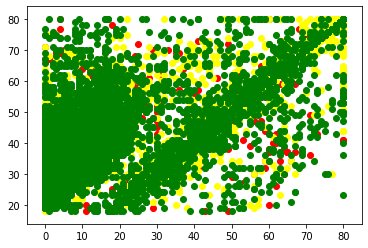

In [ ]:
# plot three clusters in same plot 
plt.scatter(d0['RIDAGEYR'], d0['DMDHRAGE'], c ='r') 
plt.scatter(d1['RIDAGEYR'], d1['DMDHRAGE'], c ='yellow') 
plt.scatter(d2['RIDAGEYR'], d2['DMDHRAGE'], c ='g') 